# First Lab preparatory work

### Library importation

In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
from utils import * # folder utils contains the functions used in this notebook

In [2]:
folder_names = ['CAC40.csv', 'DowJones.csv', 'EuroStoxx.csv', 'SandP500.csv'] # List of file names

# 1/2/3/4/5) Some informations on the data


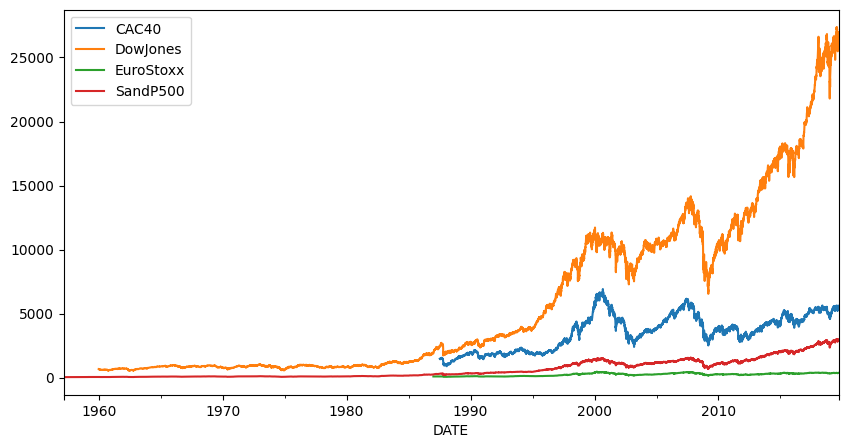

=== Info ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16313 entries, 1957-03-04 to 2019-09-11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CAC40      8395 non-null   float64
 1   DowJones   15574 non-null  float64
 2   EuroStoxx  8530 non-null   float64
 3   SandP500   16313 non-null  float64
dtypes: float64(4)
memory usage: 637.2 KB
None
=== Stats ===
             count         mean          std     min        25%      50%  \
CAC40       8395.0  3579.909896  1400.199083  893.82  2081.9400  3722.15   
DowJones   15574.0  5980.653347  6477.293083  535.76   888.9925  2602.96   
EuroStoxx   8530.0   247.354539   105.283057   68.55   133.9675   260.57   
SandP500   16313.0   655.503787   722.446354   38.98    96.5500   284.00   

                  75%       max  
CAC40       4632.8200   6922.33  
DowJones   10471.4925  27359.16  
EuroStoxx    329.1300    466.24  
SandP500    1161.5100   3025.86  

=== Time 

In [3]:
df = get_dataframe(folder_names, plot=True) # Get the dataframe and plot the data
print_stats(df) # Print basic statistics about the dataframe 

# 6/7/8)

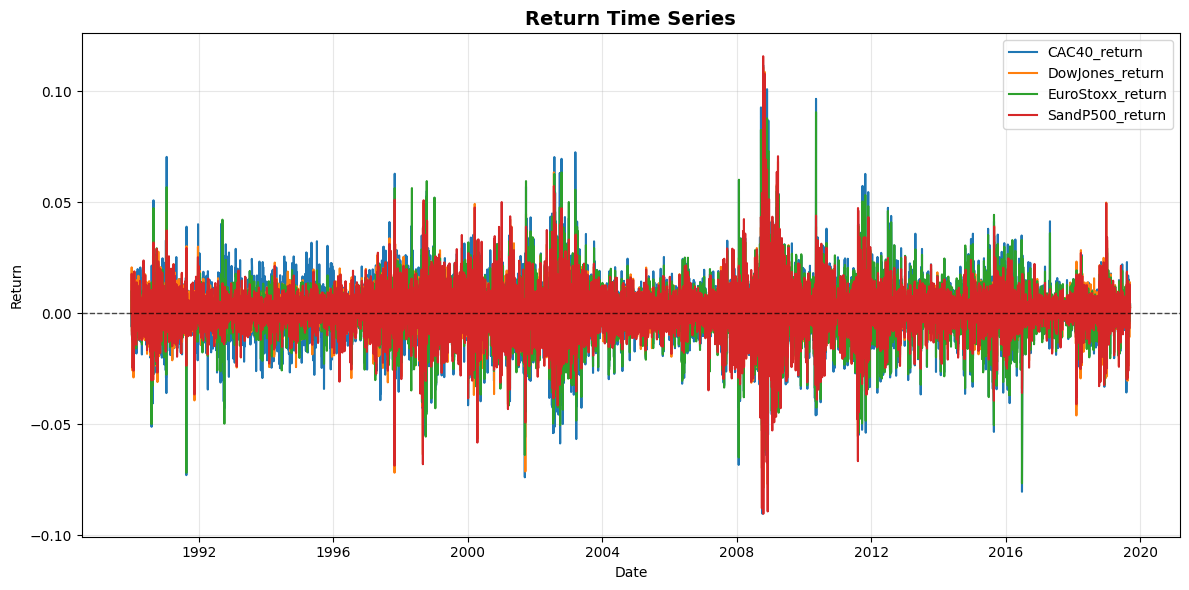

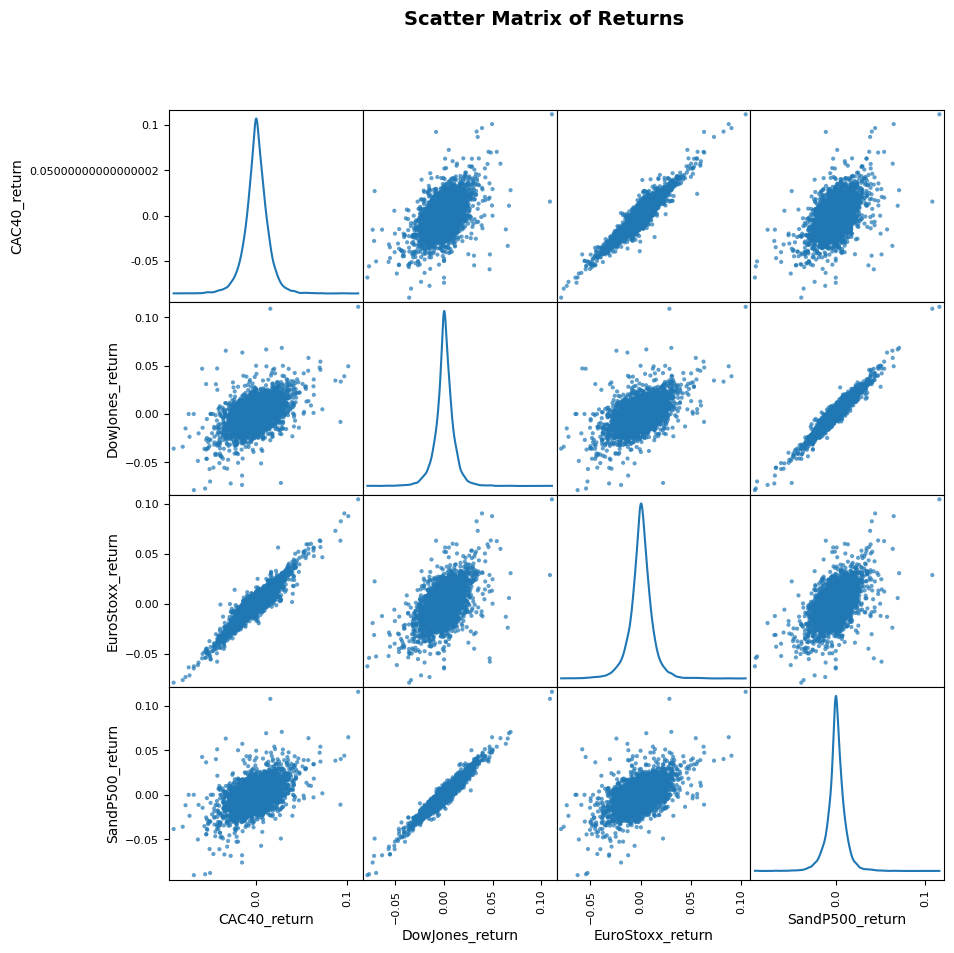

                      mean       std       min       max  cumulative_return
CAC40_return      0.000222  0.013361 -0.090368  0.111762           1.805965
DowJones_return   0.000348  0.010362 -0.078733  0.110803           8.799924
EuroStoxx_return  0.000222  0.012004 -0.079184  0.104728           2.187280
SandP500_return   0.000334  0.010826 -0.090350  0.115800           7.457131


In [4]:

spot_columns = ['CAC40', 'DowJones', 'EuroStoxx', 'SandP500']
df= add_returns(df, columns=spot_columns, method="simple")

# Q7/Q8) -> Here I choose to compute the return statistics for all the returns, but if you want to compute it only for Only EuroStoxx and CAC40 for example, you can change the return_cols argument
stat = return_statistics(df, plot = True, scatter= True,  return_cols=['CAC40_return', 'DowJones_return', 'EuroStoxx_return', 'SandP500_return'], time_interval = ['1990-01-01', '2023-01-01']) 
print(stat) # Print statistics about the return

**Note:** It is immediately apparent that there seem to be two linear relationships: one between the Dow Jones return and the S&P 500 return, and another between the CAC 40 return and the Euro Stoxx return.

# 9/10)

/Users/thomasdeportzamparc/Desktop/Cours/Dauphine203/Econometrics/Labs/first_lab/utils.py:183: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return df.resample(sample_unit).mean()


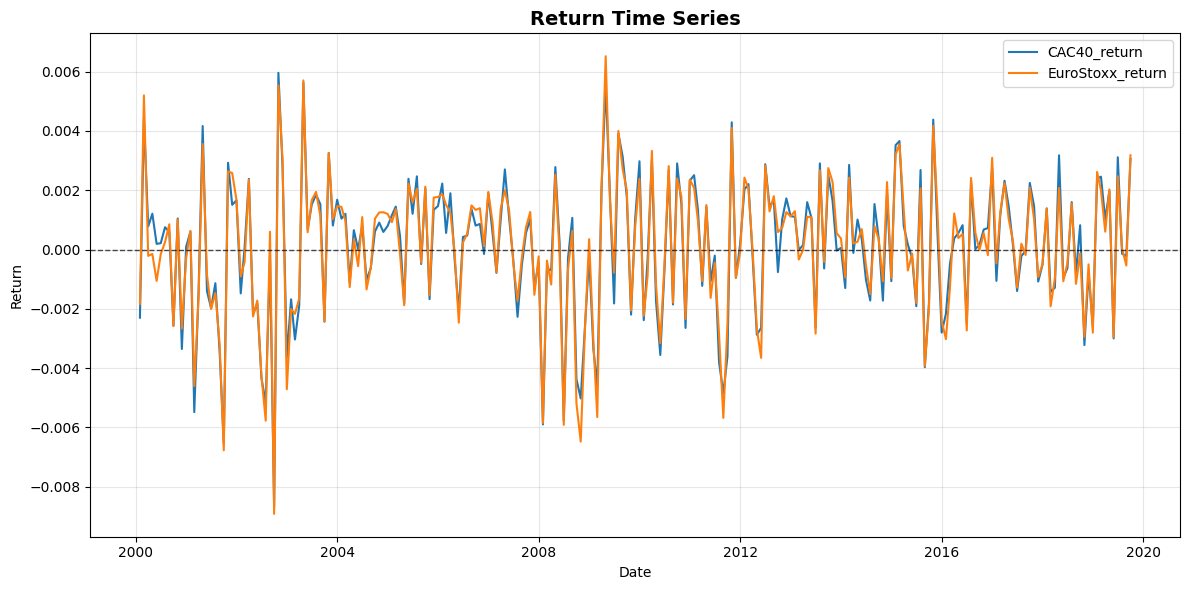

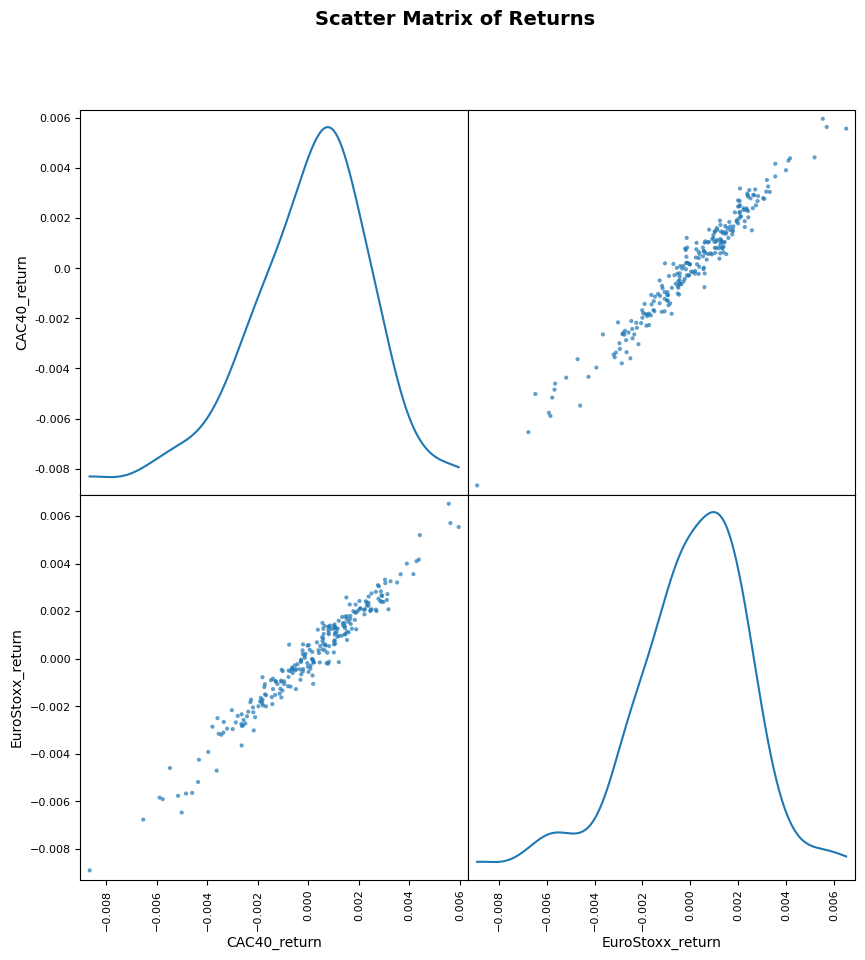

In [5]:
# Q9)  By changing the sample_unit argument, you can compute the statistics for different time frequencies (D: daily, W: weekly, M: monthly, Q: quarterly, A: annually)
df_resampled = sample_average(df, sample_unit= 'M')
# Q10) Here you can also change the time_interval argument to compute the statistics for a specific time period
stat_resampled = return_statistics(df_resampled, plot = True, scatter= True, return_cols=['CAC40_return', 'EuroStoxx_return'], time_interval=("2000-01-01", "2023-12-31"))

# 11) Compute sums of returns and cross-products

First, we calculate the **sum of returns** and the **sum of squared returns** for the two indices we are interested in:

- **EuroStoxx50 return** and its square $(r_{\text{EuroStoxx50}}^2)$  
- **CAC40 return** and its square $(r_{\text{CAC40}}^2)$  
- The **cross-product of CAC40 and EuroStoxx50 returns** $(r_{\text{CAC40}} \cdot r_{\text{EuroStoxx50}})$

These sums are important because they form the basis for computing the empirical moments 

# 12) Compute empirical means, variances, covariance, and regression parameters

From the sums calculated in Step 11, we can now compute the **empirical moments** and the **regression coefficients**.

Empirical means, variances, and covariance

- **Mean**:  
$$
\bar r = \frac{\sum r_i}{n}
$$

- **Variance**:  
$$
\text{Var}(r) = \frac{\sum r_i^2}{n} - \bar r^2
$$

- **Covariance**:  
$$
\text{Cov}(X,Y) = \frac{\sum X_i Y_i}{n} - \bar X \bar Y
$$


In [6]:
matrix_of_regression  = regression_matrix(df_resampled, return_cols=['CAC40_return', 'EuroStoxx_return', 'DowJones_return', 'SandP500_return'])
info_cac_Eur = matrix_of_regression.at['CAC40_return', 'EuroStoxx_return']
info_cac_Eur

{'sum_Y': np.float64(0.09827738357515767),
 'sum_X': np.float64(0.09092592287024487),
 'mean_Y': np.float64(0.00023136367142555947),
 'mean_X': np.float64(0.00025394672758438674),
 'sumsq_Y': np.float64(0.0025248845743642977),
 'sumsq_X': np.float64(0.0021391918453519967),
 'cross_XY': np.float64(0.0021737565383892865),
 'Beta0': np.float64(1.9038855220425134e-05),
 'Beta1': np.float64(1.0153187443671012),
 'R2': np.float64(0.8768416543132608)}

In [7]:
info_cac_Eur

{'sum_Y': np.float64(0.09827738357515767),
 'sum_X': np.float64(0.09092592287024487),
 'mean_Y': np.float64(0.00023136367142555947),
 'mean_X': np.float64(0.00025394672758438674),
 'sumsq_Y': np.float64(0.0025248845743642977),
 'sumsq_X': np.float64(0.0021391918453519967),
 'cross_XY': np.float64(0.0021737565383892865),
 'Beta0': np.float64(1.9038855220425134e-05),
 'Beta1': np.float64(1.0153187443671012),
 'R2': np.float64(0.8768416543132608)}

# 13)  Estimate the simple regression model (command ols),
 and check the values calculated in the previous question. Save the regression table into a file (command outfile ... end outfile) called "IndexRegResults.txt".

In [8]:
regression_stat_module= run_regression(df_resampled, y_col='CAC40_return', x_col='EuroStoxx_return', outfile="CAC40_EuroStoxx_RegResults.txt", write_file=False)

                            OLS Regression Results                            
Dep. Variable:           CAC40_return   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     2741.
Date:                Fri, 19 Sep 2025   Prob (F-statistic):          3.47e-177
Time:                        14:54:35   Log-Likelihood:                 2168.4
No. Observations:                 387   AIC:                            -4333.
Df Residuals:                     385   BIC:                            -4325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.38e-05   4.57e-05  

**Comment:** 

Both approaches return almost identical results:
- Beta0 ≈ 0, Beta1 ≈ 1.03–1.04
- R² ≈ 0.856, meaning ~85% of CAC40 variance is explained by EuroStoxx50, indicating a very strong relationship between these European indices.
- OLS additionally provides standard errors, t-statistics, and p-values, confirming the coefficient is highly significant (p < 0.001).
- Minor differences between manual and OLS regression stem from rounding or using n vs n-1 in variance calculations, but these are negligible.


---

# 14) Intercept Test (β₀ = 0) — Summary and Interpretation

**Context:** simple regression `CAC40_return ~ EuroStoxx_return`
Relevant excerpts from the OLS table:

* `const = 8.274e-06`, `std err = 5.55e-05`
* `EuroStoxx_return = 1.0413`, `std err = 0.005`
* `n = 8394`

---

## (a) Test Statistic (absolute value)

$$
t = \frac{\hat\beta_0}{\mathrm{SE}(\hat\beta_0)} = \frac{8.274\times10^{-6}}{5.55\times10^{-5}} \approx 0.149
$$

Absolute value: \$|t| = 0.149\$.

---

## (b) p-value and Interpretation

Two-sided p-value:

$$
p = 2\big(1 - F_{t_{n-2}}(|t|)\big) \approx 0.882
$$

* **Interpretation:** \$p = 0.882 \gg 0.10\$ (and \$\gg 0.05\$), so we **fail to reject** \$H\_0:\beta\_0=0\$. The intercept is not significantly different from zero (at a 90% confidence level, or 10% significance, which is quite loose).

* **Regarding function usage (R):**

  * `pt` : yes, it can be used to compute the p-value as \$p = 2\*(1 - pt(|t|, df))\$.
  * `t.test` : **not suitable** here — `t.test` is for testing sample means, not regression coefficients. For coefficients, one should use `summary(lm(...))` (which provides p-values directly) or calculate the p-value manually using `pt`.
  * `pvalue` (extracted from `summary(lm)`) : yes, this is the recommended and direct way to obtain the p-value for a regression coefficient.

---

## (c) Verification in the OLS Table

The OLS table shows `t = 0.149` and `P>|t| = 0.882` for the intercept — perfectly matching our manual calculation.


In [9]:
matrix_of_regression = test_intercept(df_resampled,matrix_of_regression) # Test on the intercept (β₀ = 0) 
matrix_of_regression = test_beta1(df_resampled, matrix_of_regression) # Test on the slope (β₁ = 0)
matrix_of_regression.at['CAC40_return','EuroStoxx_return'] # Get the regression results for CAC40_return ~ EuroStoxx_return

{'sum_Y': np.float64(0.09827738357515767),
 'sum_X': np.float64(0.09092592287024487),
 'mean_Y': np.float64(0.00023136367142555947),
 'mean_X': np.float64(0.00025394672758438674),
 'sumsq_Y': np.float64(0.0025248845743642977),
 'sumsq_X': np.float64(0.0021391918453519967),
 'cross_XY': np.float64(0.0021737565383892865),
 'Beta0': np.float64(1.9038855220425134e-05),
 'Beta1': np.float64(1.0153187443671012),
 'R2': np.float64(0.8768416543132608),
 'p_value_intercept': np.float64(0.6773724758878013),
 't_stat_intercept': np.float64(0.41636838597160103),
 'result_intercept': 'Fail to reject H0: intercept = 0',
 'p_value_beta1': np.float64(0.0),
 't_stat_beta1': np.float64(52.15337216055283),
 'result_beta1': 'We reject H0: beta1 != 0'}


---

# (15) Matrix Regression: Reminder

We have :

$$
\hat\beta = (X'X)^{-1}X'Y,\qquad s^2=\frac{\sum\hat\varepsilon^2}{n-k}
$$

$$
\mathrm{Var}(\hat\beta)=s^2 (X'X)^{-1},\qquad t_j=\frac{\hat\beta_j}{\sqrt{\mathrm{Var}(\hat\beta_j)}}
$$

In [10]:
linear_regression_with_matrix(df_resampled)

,CAC40_return,DowJones_return,EuroStoxx_return,SandP500_return
CAC40_return,None,"{'Beta0': -7.266052009376566e-05, 'Beta1': 0.9...","{'Beta0': 1.3802489479410425e-05, 'Beta1': 1.0...","{'Beta0': -6.276323893319407e-05, 'Beta1': 0.9..."
DowJones_return,"{'Beta0': 0.00021014429047497475, 'Beta1': 0.5...",None,"{'Beta0': 0.0002277695309298358, 'Beta1': 0.62...","{'Beta0': -4.242995981664475e-07, 'Beta1': 0.9..."
EuroStoxx_return,"{'Beta0': 1.713851821261332e-05, 'Beta1': 0.86...","{'Beta0': -9.957371084212533e-05, 'Beta1': 0.8...",None,"{'Beta0': -9.368636673471711e-05, 'Beta1': 0.9..."
SandP500_return,"{'Beta0': 0.00019439701633972898, 'Beta1': 0.5...","{'Beta0': 2.6576571438893086e-05, 'Beta1': 0.9...","{'Beta0': 0.00020861109874248908, 'Beta1': 0.6...",None


In [11]:
matrix_of_regression.to_csv("matrix_of_regression.csv") # Save the regression results to a csv file


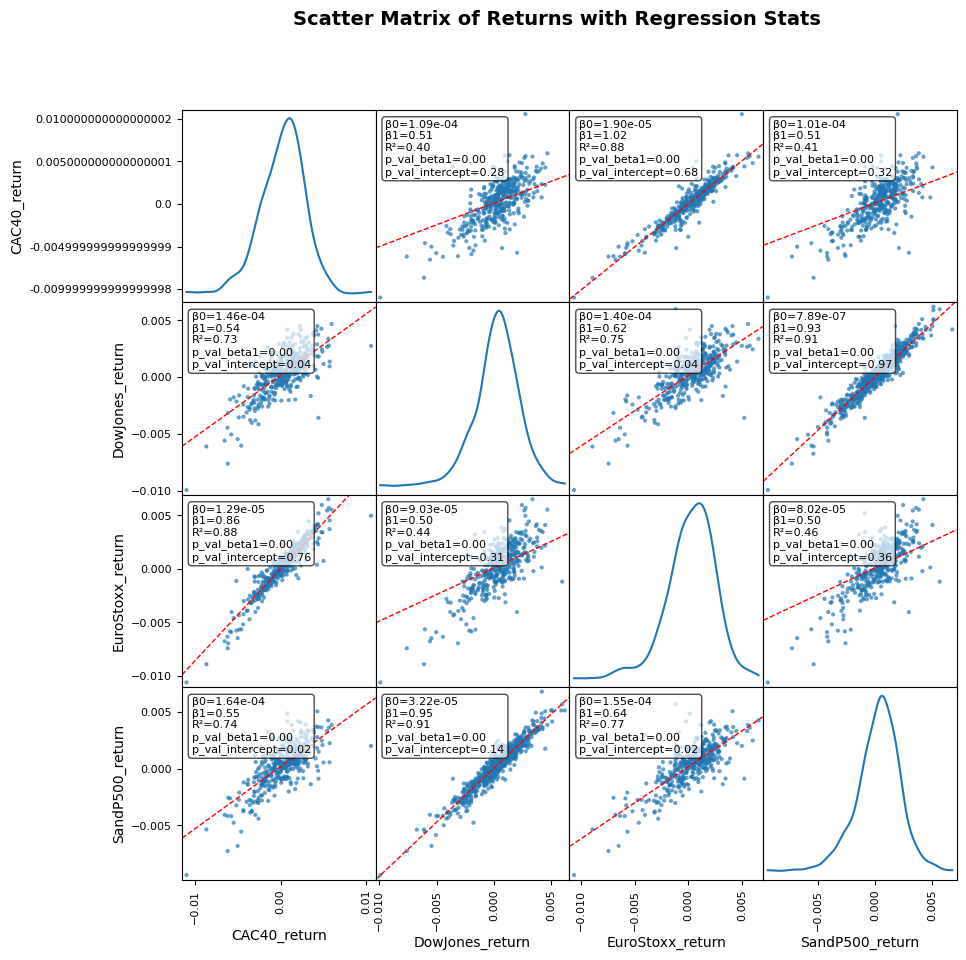

In [12]:
matrix_of_regression = scatter_with_stats(df_resampled, matrix_of_regression)


---

# 16) Economic Interpretation of the Links

* **CAC40 ↔ Eurostoxx:** coefficient ≈ **1.03–1.04**, **highly significant**, \$R^2 \approx 0.856\$. About 86% of the variance of the CAC40 is explained by the Eurostoxx, showing strong co-movement within European equity markets.

* **CAC40 ↔ Dow Jones / S\&P500:** coefficients β₁ ≈ 0.40–0.41, **highly significant** (p-values ≈ 0), but \$R^2\$ is low (≈ 0.21–0.22), indicating that only a small portion of CAC40 variance is explained by US indices. There is still a meaningful positive correlation, as expected for major global indices, but the explanatory power is weaker compared to the Eurostoxx.

* **Dow Jones ↔ S\&P500:** coefficient β₁ ≈ 0.94–0.96, **highly significant**, with **R² ≈ 0.92–0.93**. This indicates a very strong relationship between the two US indices, with over 90% of the variance of one index explained by the other.

**Conclusion:** the regression shows strong significance for all indices, with the Eurostoxx explaining most of the CAC40 variance, US indices having a smaller but significant effect, and a very tight relationship between Dow Jones and S\&P500.



---

# 17) Conclusion

From our analysis of the regression relationships among the CAC40, Eurostoxx, Dow Jones, and S\&P500 returns, we can draw several key insights:

1. **Strong intra-European link:** The CAC40 is highly correlated with the Eurostoxx, with a regression coefficient β₁ ≈ 1.04 and \$R^2 \approx 0.856\$. This indicates that about 86% of the variance of the CAC40 can be explained by the Eurostoxx, reflecting strong co-movement within European equity markets.

2. **Moderate influence from US indices:** The CAC40 also exhibits positive correlations with the Dow Jones and S\&P500, with significant β₁ coefficients (\~0.40–0.41), but lower explanatory power (\$R^2 \approx 0.21–0.22\$). This shows that while US markets do impact the CAC40, their effect is smaller compared to European indices.

3. **Very strong US market link:** The Dow Jones and S\&P500 are extremely closely related, with β₁ ≈ 0.94–0.96 and \$R^2 \approx 0.92–0.93\$, indicating that movements in one index almost entirely explain the variance of the other.

4. **Intercepts:** Across all regressions, the intercepts are not significantly different from zero, confirming that the relationships are mainly driven by the slopes (β₁).

**Overall:** These results highlight strong intra-regional co-movements, particularly within Europe and within the US, and demonstrate that global equity markets are interconnected, with European indices being most influential for the CAC40, and US indices being tightly linked among themselves.
